#Example 3 - Loading a local file

Alternatively, HMSFire data can be loaded locally.
This allows to load data from previous experimentations or sharing specific periods of time.
Mote that this version only works with 'csv' files, thus all management of files must be on .csv format.

In [ ]:
pip install HMSFire

Alternativelly, the same information can be downloaded before.
This dataset has fire information from ``2003-04-01`` to ``2023-02-01``.

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=FILEID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1yYhMY1MUnRZHGBguXd9s7aX92TPGnQCU" -O data.csv && rm -rf /tmp/cookies.txt

--2023-03-31 22:41:52--  https://docs.google.com/uc?export=download&confirm=&id=1yYhMY1MUnRZHGBguXd9s7aX92TPGnQCU
Resolving docs.google.com (docs.google.com)... 172.217.193.139, 172.217.193.102, 172.217.193.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.193.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ik01l5uekantn2unvkp2vpn7ns8pvoou/1680302475000/04289866370616218628/*/1yYhMY1MUnRZHGBguXd9s7aX92TPGnQCU?e=download&uuid=4ab7de55-7886-4df1-b67d-86906980b98f [following]
--2023-03-31 22:41:52--  https://doc-08-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ik01l5uekantn2unvkp2vpn7ns8pvoou/1680302475000/04289866370616218628/*/1yYhMY1MUnRZHGBguXd9s7aX92TPGnQCU?e=download&uuid=4ab7de55-7886-4df1-b67d-86906980b98f
Resolving doc-08-bk-docs.googleusercontent.com (doc-08-bk-docs.googleusercontent.com)... 108.177.11.13

In [3]:
from OSPO.HMSFire import HMSF
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [4]:
Fires = HMSF.HMSFire(load_file='data.csv')
data = Fires.getDataFrame()

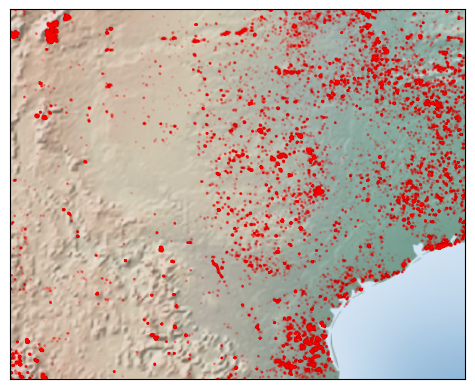

In [7]:
minlon, minlat, maxlon, maxlat = Fires.getBoundingBoxState(state='Texas')
mask = (data.Satellite=='GOES-EAST') &(data.Time > '2020-01-01') & (data.Lon>=minlon) & (data.Lat>=minlat) & (data.Lon<=maxlon) & (data.Lat<=maxlat)  & (data.FRP>=0)   #FRP=-999.0 are missing vaues..
Fires.plot(points=data[mask], minlon=minlon, minlat=minlat, maxlon=maxlon, maxlat=maxlat)